# **1. Conexion Drive**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Kaggle/'

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

# **2. Lectura de datos**

In [6]:
calories = pd.read_csv(path+'calories.csv')

In [7]:
calories.head(3)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0


In [8]:
exercise = pd.read_csv(path+'exercise.csv')

In [9]:
exercise.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7


# **3. Data Wrangling**

In [11]:
calories.shape,exercise.shape

((15000, 2), (15000, 8))

In [13]:
## Join
df = pd.concat([exercise,calories['Calories']],axis=1)

In [14]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [15]:
df.shape

(15000, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [17]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# **4. EDA**

In [18]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


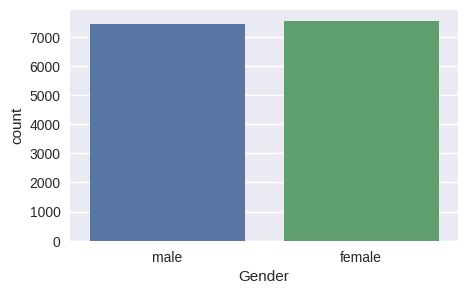

In [25]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='Gender')
plt.show();

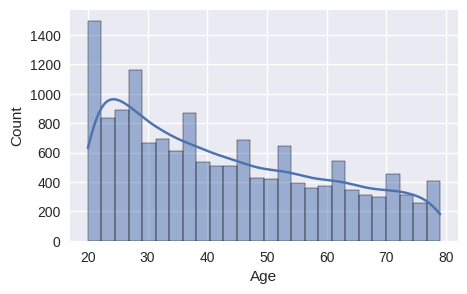

In [29]:
plt.figure(figsize=(5,3))
sns.histplot(data=df,x='Age',kde=True)
plt.show();

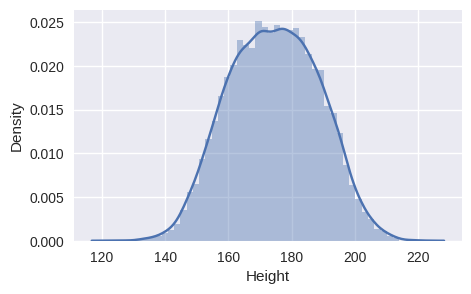

In [32]:
plt.figure(figsize=(5,3))
sns.distplot(df['Height'])
plt.show();

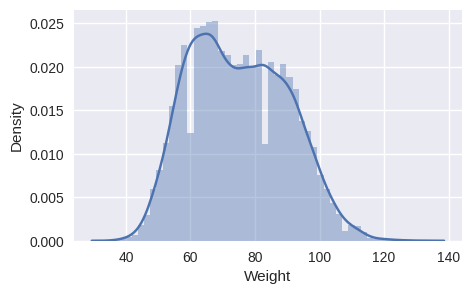

In [33]:
plt.figure(figsize=(5,3))
sns.distplot(df['Weight'])
plt.show();

## Correlation

In [34]:
df.corr()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


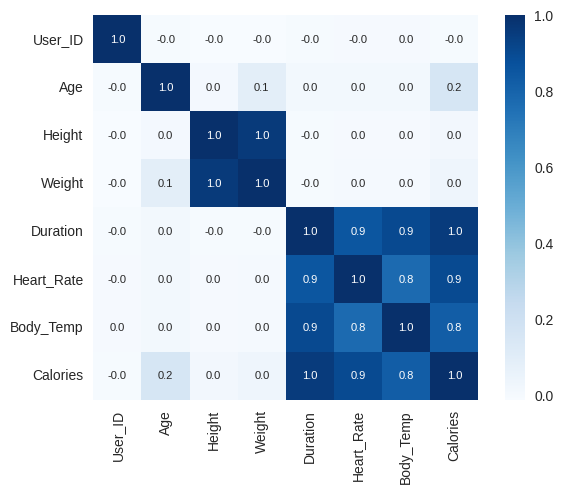

In [41]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), cbar=True,square=True,annot=True,annot_kws={'size':8}, cmap='Blues', fmt=".1f")
plt.show();

# **5. Data Pre Processing**

## Encoding

In [42]:
df.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [43]:
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0


# **6. Modelado**

## Train-Test Split

In [46]:
X = df.drop(['User_ID','Calories'],axis=1)
Y = df['Calories']

In [47]:
print(X.shape,Y.shape)

(15000, 7) (15000,)


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [50]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(12000, 7) (3000, 7) (12000,) (3000,)


## Model Creation/Evaluation

Applying regression models
* XGBoost Regressor

In [52]:
from xgboost import XGBRegressor

In [53]:
xgr = XGBRegressor()

In [54]:
xgr.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
Y_predicted = xgr.predict(X_test)

In [56]:
from sklearn import metrics

In [58]:
# R2 score
r2 = metrics.r2_score(Y_test,Y_predicted)
r2

0.998800624504713

In [59]:
# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test,Y_predicted)
mae

1.4833678883314132